In [ ]:
import numpy as np
import pandas as pd
from inference_utils.TRIDENT_for_inference import TRIDENT_for_inference
from sklearn.metrics.pairwise import cosine_similarity
from inference_utils.pytorch_data_utils import check_closest_chemical
from inference_utils.pytorch_data_utils import __loadCLSembeddings__
from inference_utils.pytorch_data_utils import __loadtrainingdf__
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from inference_utils.pytorch_data_utils import __loadCLSembeddings__
from inference_utils.pytorch_data_utils import __loadtrainingdf__
from rdkit import Chem
import pandas as pd
from pubchempy import get_compounds

Fish

In [89]:
MODEL_TYPE = 'EC50EC10'
SPECIES_GROUP = 'fish'
MODEL_VERSION = f'{MODEL_TYPE}_{SPECIES_GROUP}'
trident = TRIDENT_for_inference(model_version=MODEL_VERSION)
trident.load_fine_tuned_model()
data = pd.read_excel('../data/tutorials/REACH_dataset.xlsx')
PREDICTION_ENDPOINT = 'EC10'
PREDICTION_EFFECT = 'MOR'
EXPOSURE_DURATION = 96
SMILES_COLUMN_NAME = 'SMILES'

/home/edelin/.conda/envs/trident_plot/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Loading DNN... 

Model loaded.



In [90]:

results_fish = trident.predict_toxicity(SMILES = data[SMILES_COLUMN_NAME].to_list(), exposure_duration=EXPOSURE_DURATION, endpoint=PREDICTION_ENDPOINT, effect=PREDICTION_EFFECT, return_cls_embeddings=True)



Renamed NOEC *EC10* in 0 positions


100%|██████████| 1277/1277 [00:54<00:00, 23.27it/s]


In [91]:
results_fish=check_closest_chemical(results_fish,MODEL_TYPE, SPECIES_GROUP, PREDICTION_ENDPOINT, PREDICTION_EFFECT)
embeddings_results_fish=np.asarray(results_fish.CLS_embeddings.tolist(), dtype=np.float32)
training_data_fish_embeddings=__loadCLSembeddings__(MODEL_TYPE, SPECIES_GROUP) 
training_fish_embeddings=np.asarray(training_data_fish_embeddings.CLS_embeddings.tolist(),dtype=np.float32)

Invertebrates

In [92]:
MODEL_TYPE = 'EC50EC10'
SPECIES_GROUP = 'invertebrates'
MODEL_VERSION = f'{MODEL_TYPE}_{SPECIES_GROUP}'
trident = TRIDENT_for_inference(model_version=MODEL_VERSION)
trident.load_fine_tuned_model()
data = pd.read_excel('../data/tutorials/REACH_dataset.xlsx')
PREDICTION_ENDPOINT = 'EC10'
PREDICTION_EFFECT = 'MOR'
EXPOSURE_DURATION = 96
SMILES_COLUMN_NAME = 'SMILES'

/home/edelin/.conda/envs/trident_plot/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Loading DNN... 

Model loaded.



In [93]:
results_invertebrates = trident.predict_toxicity(SMILES = data[SMILES_COLUMN_NAME].to_list(), exposure_duration=EXPOSURE_DURATION, endpoint=PREDICTION_ENDPOINT, effect=PREDICTION_EFFECT, return_cls_embeddings=True)



Renamed NOEC *EC10* in 0 positions


100%|██████████| 1277/1277 [00:54<00:00, 23.22it/s]


In [94]:
results_invertebrates=check_closest_chemical(results_invertebrates,MODEL_TYPE, 'invertebrates', PREDICTION_ENDPOINT, PREDICTION_EFFECT)
embeddings_results_invetebrates=np.asarray(results_invertebrates.CLS_embeddings.tolist(), dtype=np.float32)
training_data_invertebrates_embeddings=__loadCLSembeddings__(MODEL_TYPE, 'invertebrates') 
training_invertebrates_embeddings=np.asarray(training_data_invertebrates_embeddings.CLS_embeddings.tolist(),dtype=np.float32)

Algae

In [95]:
MODEL_TYPE = 'EC50EC10'
SPECIES_GROUP = 'algae'
MODEL_VERSION = f'{MODEL_TYPE}_{SPECIES_GROUP}'
trident = TRIDENT_for_inference(model_version=MODEL_VERSION)
trident.load_fine_tuned_model()
data = pd.read_excel('../data/tutorials/REACH_dataset.xlsx')
PREDICTION_ENDPOINT = 'EC10'
PREDICTION_EFFECT = 'POP'
EXPOSURE_DURATION = 96
SMILES_COLUMN_NAME = 'SMILES'

/home/edelin/.conda/envs/trident_plot/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Loading DNN... 

Model loaded.



In [96]:
results_algae = trident.predict_toxicity(SMILES = data[SMILES_COLUMN_NAME].to_list(), exposure_duration=EXPOSURE_DURATION, endpoint=PREDICTION_ENDPOINT, effect=PREDICTION_EFFECT, return_cls_embeddings=True)



Renamed NOEC *EC10* in 0 positions
Did not return onehotencoding for Effect. Why? You specified only one Effect.


100%|██████████| 1277/1277 [00:55<00:00, 23.14it/s]


In [97]:
results_algae=check_closest_chemical(results_algae,MODEL_TYPE, 'algae', PREDICTION_ENDPOINT, 'POP')
embeddings_results_algae=np.asarray(results_algae.CLS_embeddings.tolist(), dtype=np.float32)
training_data_algae_embeddings=__loadCLSembeddings__(MODEL_TYPE, 'algae') 
training_algae_embeddings=np.asarray(training_data_algae_embeddings.CLS_embeddings.tolist(),dtype=np.float32)


In [98]:
#fish
train_cosine_fish={} # gather useful information from the training embeddings 
train_cosine_fish['mean cosine similarity']=cosine_similarity(training_fish_embeddings).mean(axis=0) #get mean cos sim for every training embedding 
train_cosine_df_fish=pd.DataFrame(train_cosine_fish)
#invertebrates
train_cosine_invertebrates={}
train_cosine_invertebrates['mean cosine similarity']=cosine_similarity(training_invertebrates_embeddings).mean(axis=0)
train_cosine_df_invertebrates=pd.DataFrame(train_cosine_invertebrates)
#algae
train_cosine_algae={}
train_cosine_algae['mean cosine similarity']=cosine_similarity(training_algae_embeddings).mean(axis=0)
train_cosine_df_algae=pd.DataFrame(train_cosine_algae)

In [99]:
#fish (to get the mean cosine similarity witin the training embeddings, sum them and divide by the nr of embeddings)
mean_tot_fish=sum(train_cosine_df_fish['mean cosine similarity'])/len(train_cosine_df_fish['mean cosine similarity'])
std_dev_tot_fish=train_cosine_df_fish['mean cosine similarity'].std() # get the standard deviation from the mean cos sim values of the training embeddings
# Calculate z-score for each training embedding and for each embedding in the REACH data
train_cosine_df_fish['z-score mean cosine similarity']=(train_cosine_df_fish['mean cosine similarity']-mean_tot_fish)/std_dev_tot_fish
results_fish['z-score mean cosine similarity']=(results_fish['mean cosine similarity']-mean_tot_fish)/std_dev_tot_fish
# check if the REACH data is in the training data
training_fish_all=__loadtrainingdf__('EC50EC10','fish','EC10')
results_fish['Is in training']=(results_fish['SMILES_Canonical_RDKit'].isin(training_fish_all['SMILES_Canonical_RDKit'])).astype(int)

#invertebrates
mean_tot_invertebrates=sum(train_cosine_df_invertebrates['mean cosine similarity'])/len(train_cosine_df_invertebrates['mean cosine similarity'])
std_dev_tot_invertebrates=train_cosine_df_invertebrates['mean cosine similarity'].std()
# Calculate z-score
train_cosine_df_invertebrates['z-score mean cosine similarity']=(train_cosine_df_invertebrates['mean cosine similarity']-mean_tot_invertebrates)/std_dev_tot_invertebrates
results_invertebrates['z-score mean cosine similarity']=(results_invertebrates['mean cosine similarity']-mean_tot_invertebrates)/std_dev_tot_invertebrates
training_invertebrates_all=__loadtrainingdf__('EC50EC10','invertebrates','EC10')
results_invertebrates['Is in training']=(results_invertebrates['SMILES_Canonical_RDKit'].isin(training_invertebrates_all['SMILES_Canonical_RDKit'])).astype(int)

#algae
mean_tot_algae=sum(train_cosine_df_algae['mean cosine similarity'])/len(train_cosine_df_algae['mean cosine similarity'])
std_dev_tot_algae=train_cosine_df_algae['mean cosine similarity'].std()
# Calculate z-score
train_cosine_df_algae['z-score mean cosine similarity']=(train_cosine_df_algae['mean cosine similarity']-mean_tot_algae)/std_dev_tot_algae
results_algae['z-score mean cosine similarity']=(results_algae['mean cosine similarity']-mean_tot_algae)/std_dev_tot_algae
training_algae_all=__loadtrainingdf__('EC50EC10','algae','EC10')
results_algae['Is in training']=(results_algae['SMILES_Canonical_RDKit'].isin(training_algae_all['SMILES_Canonical_RDKit'])).astype(int)

In [127]:
# Set the threshold value (For EC10, for EC50 it's 0.1)
threshold_value = 0.01
#fish
# Check th predictions against the threshold
toxic_df_fish = results_fish[results_fish['predictions (mg/L)'] < threshold_value]

# Show the toxic chemicals
print(len(toxic_df_fish)) 
#invertebrates
# Check th predictions against the threshold
toxic_df_invertebrates = results_invertebrates[results_invertebrates['predictions (mg/L)'] < threshold_value]

# Show the toxic chemicals
print(len(toxic_df_invertebrates)) 
#algae
# Check th predictions against the threshold
toxic_df_algae = results_algae[results_algae['predictions (mg/L)'] < threshold_value]

# Show the toxic chemicals
print(len(toxic_df_algae)) 

52
146
146


In [128]:

def plot_hexbin_uncertain(df_fish, df_invertebrate, df_algae, threshold, factor):
    vmin, vmax = 0, 100
    def prepare_data(df, threshold, factor):
        df['is toxic'] = (df['predictions (mg/L)'] * factor < threshold).astype(int)
        df['is uncertain'] = (abs(df['z-score mean cosine similarity']) > 2).astype(int)

        embeddings = np.array(df.CLS_embeddings.tolist()).astype(np.float32)
        pca = PCA(n_components=2).fit_transform(embeddings)
        projections = pd.DataFrame({'pc1': pca[:, 0], 'pc2': pca[:, 1]})
        return pd.concat([df, projections], axis=1)
    
    def plot_subplot(ax, df, title, show_legend=True):
        non_toxic_certain = df[(df['is toxic'] == 0)&(df['is uncertain']==0)]
        toxic_certain = df[(df['is toxic'] == 1)&(df['is uncertain']==0)]
        non_toxic_uncertain=df[(df['is toxic']==0)&(df['is uncertain']==1)]
        toxic_uncertain=df[(df['is toxic']==1)&(df['is uncertain']==1)]

        ax.hexbin(non_toxic_certain['pc1'], non_toxic_certain['pc2'], gridsize=50, cmap='Blues',mincnt=1, alpha=0.9,label='Non-toxic witin 2 std')
        ax.scatter(toxic_certain['pc1'], toxic_certain['pc2'], color='red', s=10, label='Toxic witin 2 std')
        ax.scatter(non_toxic_uncertain['pc1'],non_toxic_uncertain['pc2'],color='green',s=10, label='Non-toxic beyond 2 std')
        ax.scatter(toxic_uncertain['pc1'],toxic_uncertain['pc2'],color='orange',s=10, label='Toxic beyond 2 std')
        

        ax.set_title(title)
        ax.set_xlabel('PCA Component 1')
        ax.set_ylabel('PCA Component 2')
        if show_legend:
            # Custom legend handles
            ax.legend()

    # Prepare datasets
    df_fish = prepare_data(df_fish, threshold, factor)
    df_invertebrate = prepare_data(df_invertebrate, threshold, factor)
    df_algae = prepare_data(df_algae, threshold, factor)

    # Plot
    fig, axs = plt.subplots(3, 2, figsize=(15, 20))
    datasets = [(df_fish, "Fish"), (df_invertebrate, "Invertebrates"), (df_algae, "Algae")]
    for i, (df, label) in enumerate(datasets):
        plot_subplot(axs[i, 0], df, f'{label}: All Data')
        plot_subplot(axs[i, 1], df[df['Is in training'] == 0], f'{label}: New Data Only', show_legend=False)
    plt.tight_layout()
    plt.savefig("reach_all_fig_EC10.pdf",format='pdf')
    return fig


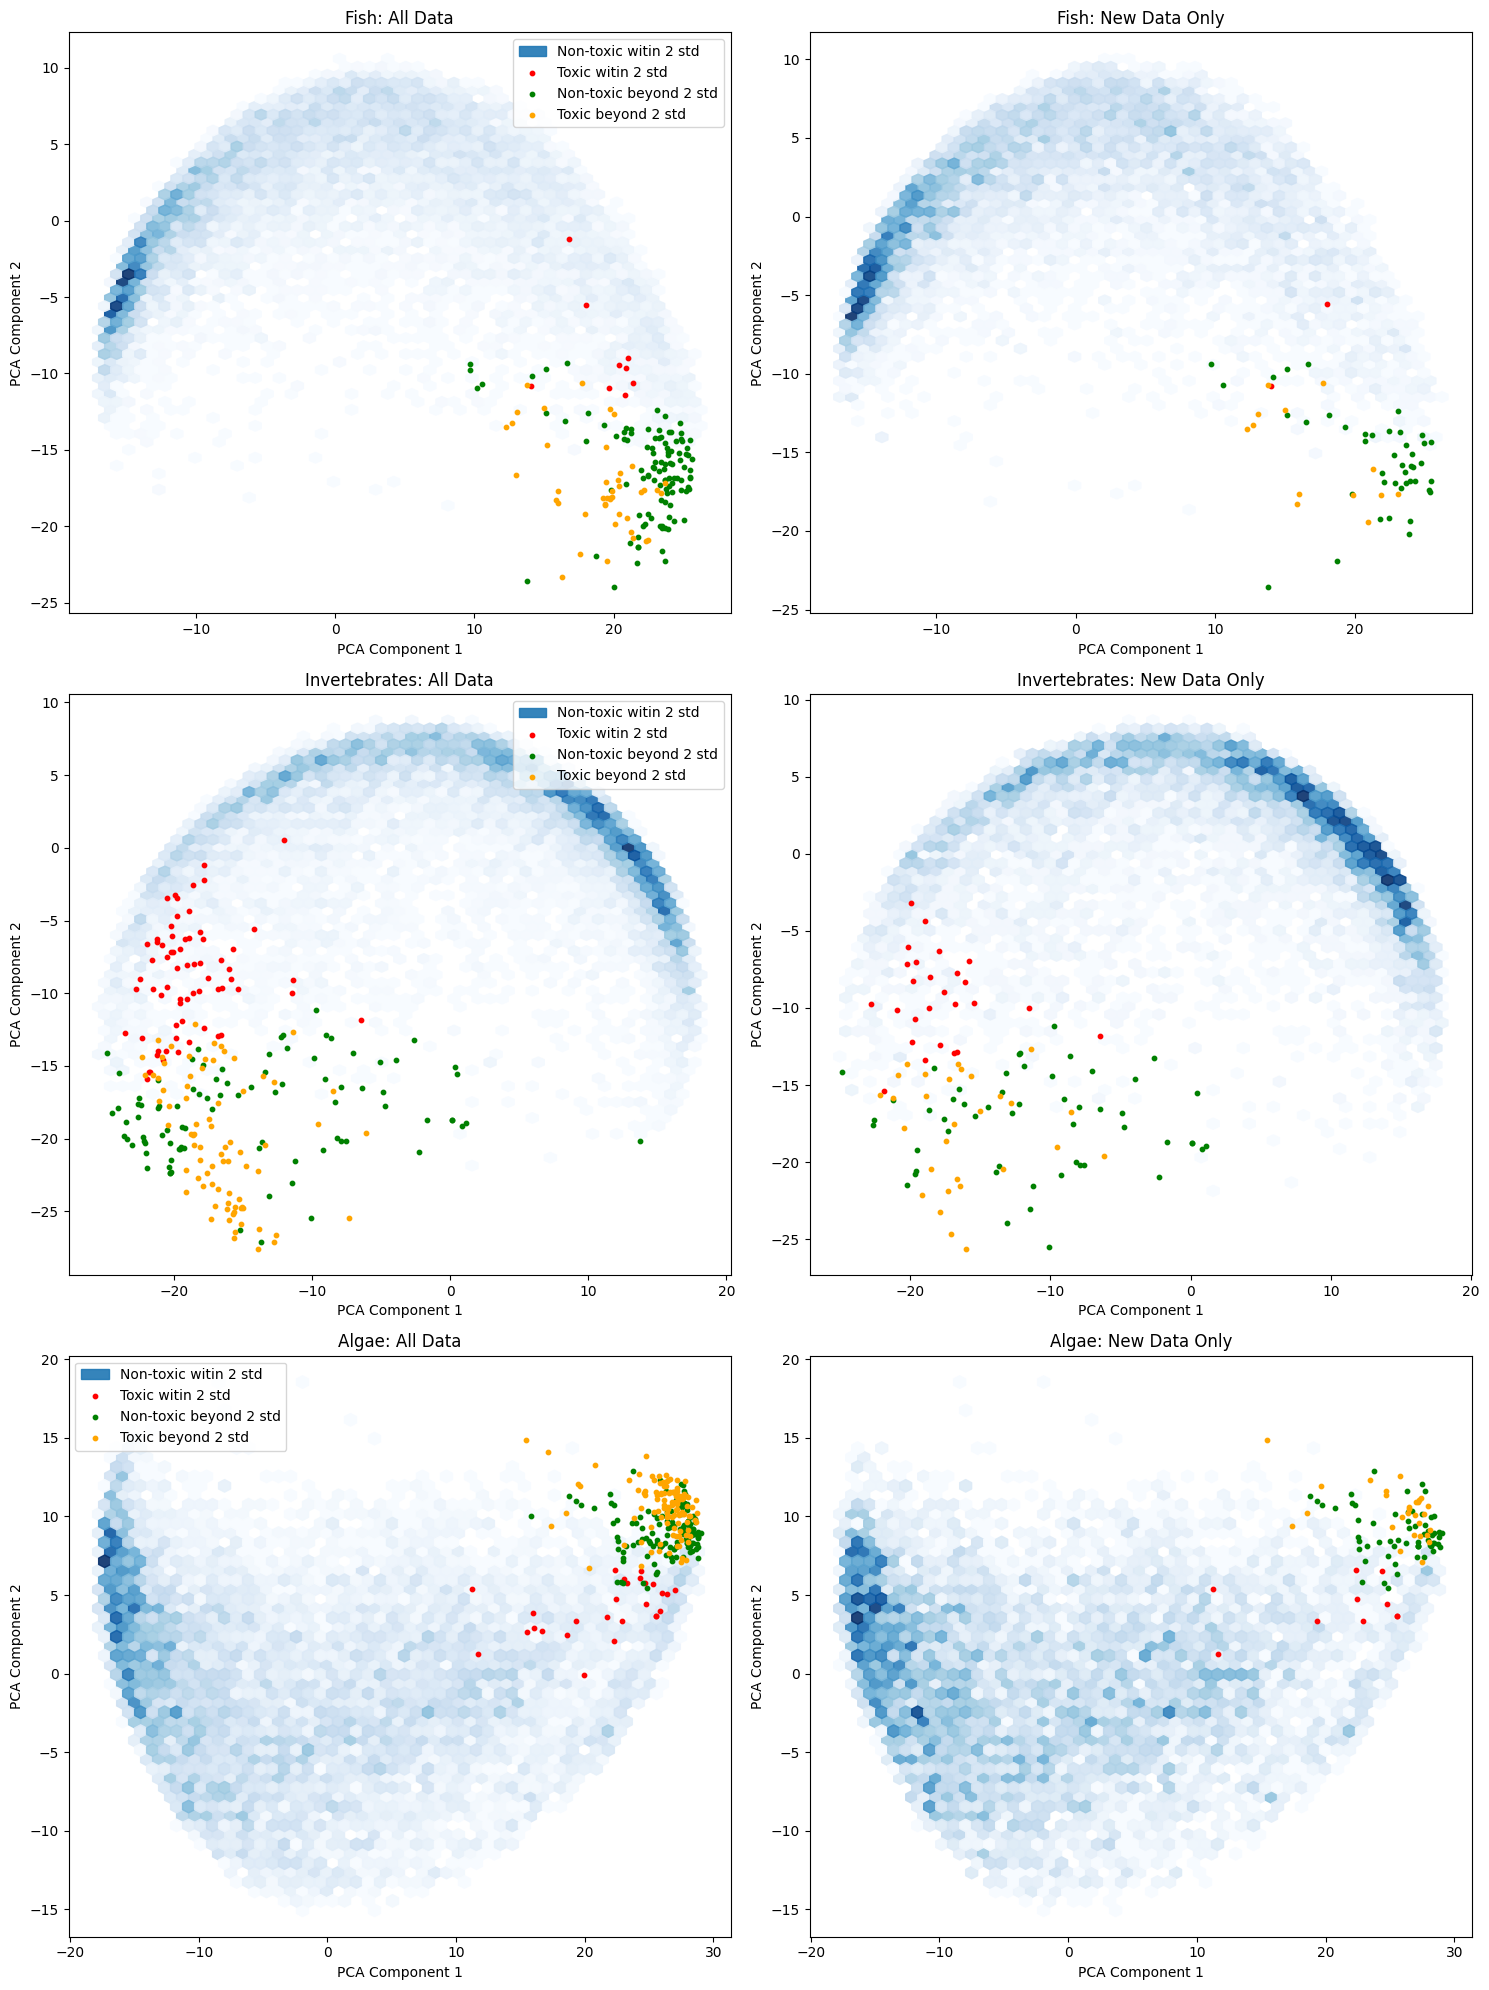

In [129]:
f=plot_hexbin_uncertain(results_fish,results_invertebrates,results_algae,threshold_value,1) 

In [130]:
f.savefig("reach_all_fig_EC10.pdf",format='pdf')

In [104]:
def plot_hexbin_uncertain_fish(df_fish, threshold, factor):
    vmin, vmax = 0, 100
    def prepare_data(df, threshold, factor):
        df['is toxic'] = (df['predictions (mg/L)'] * factor < threshold).astype(int)
        df['is uncertain'] = (abs(df['z-score mean cosine similarity']) > 2).astype(int)

        embeddings = np.array(df.CLS_embeddings.tolist()).astype(np.float32)
        pca = PCA(n_components=2).fit_transform(embeddings)
        projections = pd.DataFrame({'pc1': pca[:, 0], 'pc2': pca[:, 1]})
        return pd.concat([df, projections], axis=1)
    
    def plot_subplot(ax, df, title, show_legend=True):
        non_toxic_certain = df[(df['is toxic'] == 0)&(df['is uncertain']==0)]
        toxic_certain = df[(df['is toxic'] == 1)&(df['is uncertain']==0)]
        non_toxic_uncertain=df[(df['is toxic']==0)&(df['is uncertain']==1)]
        toxic_uncertain=df[(df['is toxic']==1)&(df['is uncertain']==1)]

        ax.hexbin(non_toxic_certain['pc1'], non_toxic_certain['pc2'], gridsize=50, cmap='Blues',mincnt=1, alpha=0.9,label='Non-toxic witin 2 std')
        ax.scatter(toxic_certain['pc1'], toxic_certain['pc2'], color='red', s=10, label='Toxic witin 2 std')
        ax.scatter(non_toxic_uncertain['pc1'],non_toxic_uncertain['pc2'],color='green',s=10, label='Non-toxic beyond 2 std')
        ax.scatter(toxic_uncertain['pc1'],toxic_uncertain['pc2'],color='orange',s=10, label='Toxic beyond 2 std')
        

        ax.set_title(title)
        ax.set_xlabel('PCA Component 1')
        ax.set_ylabel('PCA Component 2')
        if show_legend:
            
            ax.legend()

    # Prepare datasets
    df_fish = prepare_data(df_fish, threshold, factor)

    # Plot
    fig, axs = plt.subplots(1, 2, figsize=(15, 7))
    plot_subplot(axs[ 0], df_fish, f'Fish: All Data')
    plot_subplot(axs[ 1], df_fish[df_fish['Is in training'] == 0], f'Fish: New Data Only', show_legend=False)
    plt.tight_layout()
    #plt.savefig("reach_fish_EC50_fig.pdf",format='pdf')
    return fig

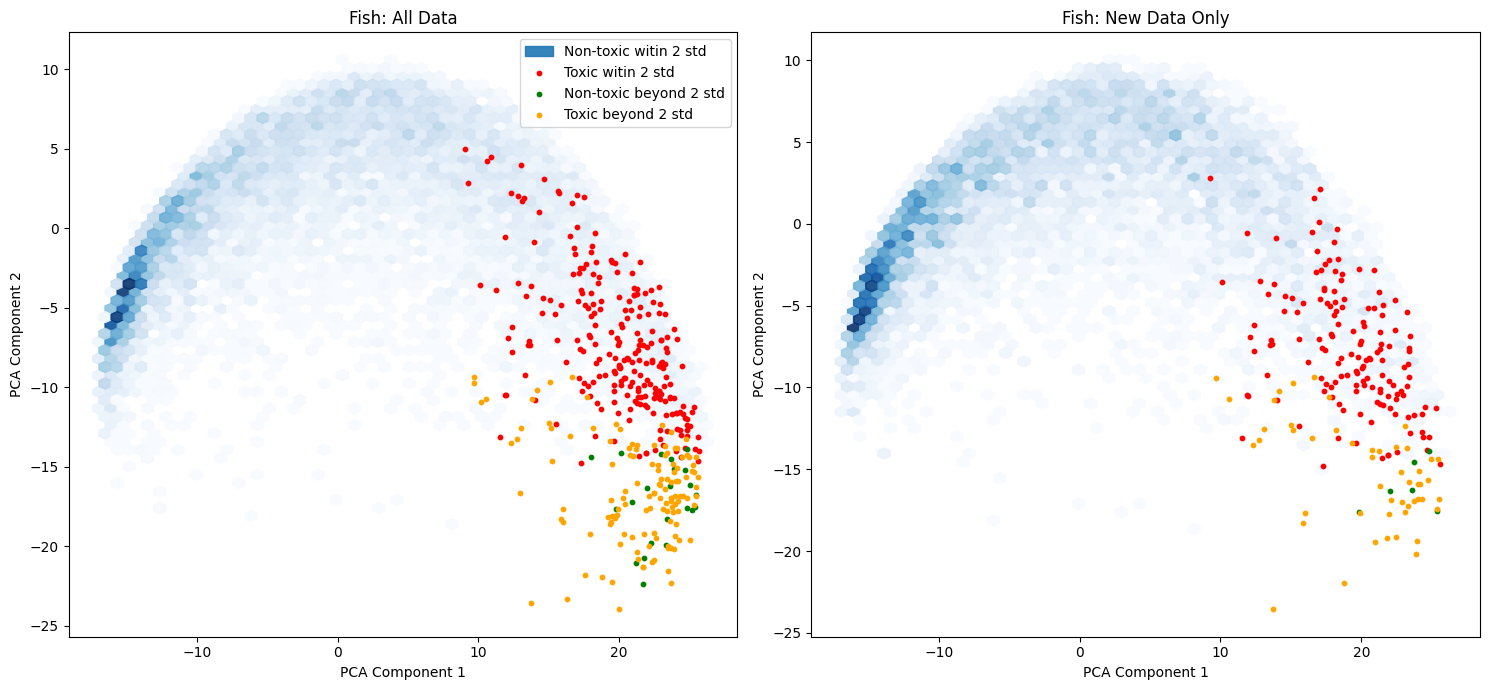

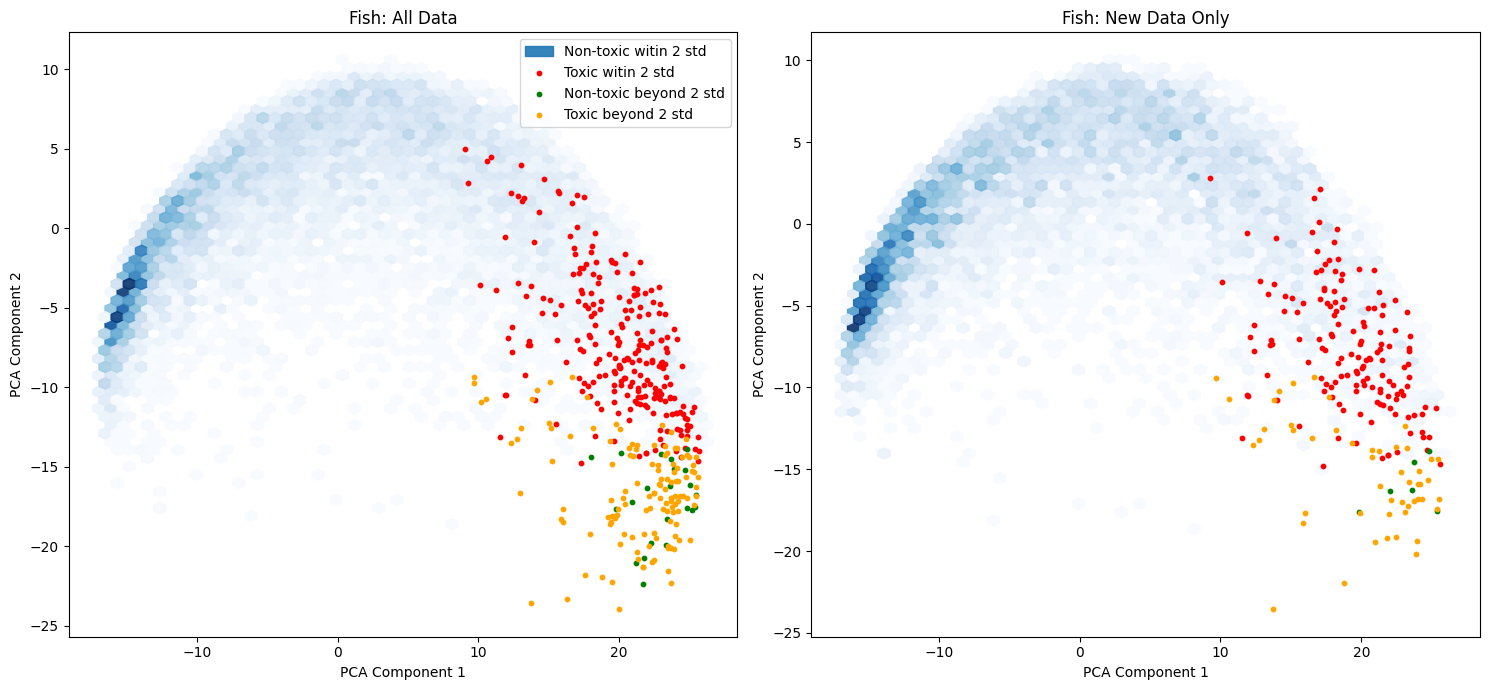

In [105]:
plot_hexbin_uncertain_fish(results_fish,threshold_value,1)

Collect the toxic chemicals from the fish  

Collect the toxic chemicals from the invertebrates

Collect the toxic chemicals from the algae 

In [106]:
def toxicity_interception(df_fish, df_invertebrate, df_algae, threshold, factor):
    def prepare_data(df, threshold, factor):
        df['is toxic'] = (df['predictions (mg/L)'] * factor < threshold).astype(int)
        df['is uncertain'] = (abs(df['z-score mean cosine similarity']) > 2).astype(int)

        return df
    def is_toxic(df):
        
        return df[df['is toxic']==1]
    
    def common_chem(df1, df2):
         if 'SMILES_Canonical_RDKit' not in df1.columns or 'SMILES_Canonical_RDKit' not in df2.columns:
            raise ValueError("Both DataFrames must contain the 'SMILES_Canonical_RDKit' column.")
    
        # Extract the 'SMILES_Canonical_RDKit' column as sets
         set1 = set(df1['SMILES_Canonical_RDKit'])
         set2 = set(df2['SMILES_Canonical_RDKit'])
         
         # Find the intersection of the two sets
         common_smiles = set1 & set2
     
         # Filter df1 to keep only rows with common elements
         df_common = df1[df1['SMILES_Canonical_RDKit'].isin(common_smiles)]

         return df_common
    
    df_fish = prepare_data(df_fish, threshold, factor)
    df_invertebrate = prepare_data(df_invertebrate, threshold, factor)
    df_algae = prepare_data(df_algae, threshold, factor)
    df_toxic_fish=is_toxic(df_fish)
    df_toxic_invertebrate=is_toxic(df_invertebrate)
    df_toxic_algae=is_toxic(df_algae)
    common_fish_invertebrate=common_chem(df1=df_toxic_fish,df2=df_toxic_invertebrate)
    common_fish_algae=common_chem(df1=df_toxic_fish,df2=df_toxic_algae)
    common_invertebrate_algae=common_chem(df1=df_toxic_invertebrate,df2=df_toxic_algae)
    common_all=common_chem(df1=common_fish_invertebrate,df2=df_toxic_algae)


    return common_fish_invertebrate,common_fish_algae,common_invertebrate_algae,common_all

In [107]:
common_fish_invertebrate,common_fish_algae, common_invertebrate_algae,common_all=toxicity_interception(results_fish,results_invertebrates,results_algae,threshold=threshold_value,factor=1)

Look at those not in training

In [108]:
# are interested only in those that have no measured value
common_fish_invertebrate=common_fish_invertebrate[common_fish_invertebrate['Is in training']==0]
common_fish_algae=common_fish_algae[common_fish_algae['Is in training']==0]
common_invertebrate_algae=common_invertebrate_algae[common_invertebrate_algae['Is in training']==0]
common_all=common_all[common_all['Is in training']==0]

In [109]:
print(len(common_fish_invertebrate))
common_fish_invertebrate

76


,SMILES,exposure_duration log10(h),endpoint,effect,SMILES_Canonical_RDKit,predictions log10(mg/L),predictions (mg/L),CLS_embeddings,most similar chemical,max cosine similarity,mean cosine similarity,z-score mean cosine similarity,Is in training,is toxic,is uncertain
200,S=[P]12S[P]3(=S)S[P](=S)(S1)S[P](=S)(S2)S3,1.982271,EC10,MOR,S=P12SP3(=S)SP(=S)(S1)SP(=S)(S2)S3,-1.803616,0.015718,"[-0.2760900557041168, -0.17707857489585876, -0...",CN(C)C(=S)S[Cu]SC(=S)N(C)C,0.906362,0.186125,-1.324455,0,1,0
468,C[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O[...,1.982271,EC10,MOR,C[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O[...,-1.909787,0.012309,"[-0.7846433520317078, -1.0598918199539185, -0....",C[Si]1(C)O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O1,0.981388,-0.017775,-2.649957,0,1,1
524,CC(C)[C@@H](C)/C=C/[C@@H](C)[C@H]1CC[C@H]2C3=C...,1.982271,EC10,MOR,CC(C)[C@@H](C)/C=C/[C@@H](C)[C@H]1CC[C@H]2C3=C...,-1.035933,0.092059,"[1.1618658304214478, -1.1658388376235962, -0.9...",C/C=C(/C)C(=O)O[C@H]1CC[C@@]2(C)[C@@H]3CC[C@@H...,0.645154,0.066844,-2.099869,0,1,1
1048,C[Si]1(C)O[Si](C)(C)O[Si](C)(C)O1,1.982271,EC10,MOR,C[Si]1(C)O[Si](C)(C)O[Si](C)(C)O1,-1.757641,0.017473,"[-1.392209768295288, -1.1460412740707397, -0.1...",C[Si]1(C)O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O1,0.974941,-0.007840,-2.585372,0,1,1
1175,[H+].[H+].[Cl-].[Cl-].OCCOCCN1CCN(CC1)C(c2cccc...,1.982271,EC10,MOR,OCCOCCN1CCN(C(c2ccccc2)c2ccc(Cl)cc2)CC1.[Cl-]....,-1.079157,0.083338,"[0.7274933457374573, 0.9869251847267151, 0.273...",CN(C)c1ccc([C+](c2ccc(N(C)C)cc2)c2ccc(N(C)C)cc...,0.559974,0.154713,-1.528658,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9899,C[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)C,1.982271,EC10,MOR,C[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)C,-1.796805,0.015966,"[-1.1232948303222656, -1.0032886266708374, -0....",C[Si]1(C)O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O1,0.973490,0.010921,-2.463413,0,1,1
10041,CCCC[O]|[Sn](|[O]CCCC)(CCCC)CCCC,1.982271,EC10,MOR,CCCC[O]|[Sn](|[O]CCCC)(CCCC)CCCC,-1.736009,0.018365,"[-1.136741042137146, -1.2329577207565308, -0.3...",C[O]|[Sn](CCCC)(CCCC)CCCC,0.984344,-0.052171,-2.873559,0,1,1
10062,C[O]|[Sn](|[O]C)(CCCC)CCCC,1.982271,EC10,MOR,C[O]|[Sn](|[O]C)(CCCC)CCCC,-1.560918,0.027484,"[-1.311124563217163, -1.2007439136505127, -0.4...",CCCC[Sn](|[O]C(=O)c1ccccc1)(CCCC)CCCC,0.973187,-0.055123,-2.892746,0,1,1
10108,[SH--].[Cu+].[Cu+],1.982271,EC10,MOR,[Cu+].[Cu+].[SH-2],-1.500542,0.031583,"[-0.5141381621360779, 0.28365328907966614, -0....",[Na+].[Na+].[SH-],0.967577,0.340464,-0.321143,0,1,0


In [110]:
print(len(common_fish_algae))
common_fish_algae

40


,SMILES,exposure_duration log10(h),endpoint,effect,SMILES_Canonical_RDKit,predictions log10(mg/L),predictions (mg/L),CLS_embeddings,most similar chemical,max cosine similarity,mean cosine similarity,z-score mean cosine similarity,Is in training,is toxic,is uncertain
134,[Cl-].CCCCCCCCCCCCCCCC(=O)OCC[N+](C)(C)CCOC(=O...,1.982271,EC10,MOR,CCCCCCCCCCCCCCCC(=O)OCC[N+](C)(C)CCOC(=O)CCCCC...,-1.024082,0.094606,"[-0.8905493021011353, -0.5528203248977661, -0....",CCCCCCCCc1ccc(N)cc1,0.927900,0.118137,-1.766428,0,1,0
555,C[C@]12CCC(=O)C=C1CC[C@@H]3[C@@H]2CC[C@@]4(C)[...,1.982271,EC10,MOR,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C...,-1.144505,0.071696,"[0.5042819976806641, 0.16207490861415863, -0.9...",C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@@H]4...,0.960456,0.121993,-1.741362,0,1,0
2014,CN(C(=S)SSC(=S)N(C)c1ccccc1)c2ccccc2,1.982271,EC10,MOR,CN(C(=S)SSC(=S)N(C)c1ccccc1)c1ccccc1,-1.737661,0.018295,"[0.3370301425457001, -1.1643002033233643, -0.6...",COc1nn(CSP(=S)(OC)OC)c(=O)s1,0.912904,0.272125,-0.765396,0,1,0
2087,CCCCCCCCCCCCCCCCCCOCCCN(C)C,1.982271,EC10,MOR,CCCCCCCCCCCCCCCCCCOCCCN(C)C,-1.037357,0.091758,"[-0.8173956274986267, -0.6886216998100281, -0....",CCCCCCCCCCCCCCCC[N+](C)(C)C.[Cl-],0.967495,0.140061,-1.623906,0,1,0
2281,CCCCCCCCCCCCCCCCCCCCCC(=O)NCCCN(C)C,1.982271,EC10,MOR,CCCCCCCCCCCCCCCCCCCCCC(=O)NCCCN(C)C,-1.016415,0.096291,"[-0.23635852336883545, 0.13344115018844604, 0....",CCCCCCCCCCCCCCCCCC(=O)NCCCN(C)C,0.959076,0.351511,-0.249327,0,1,0
2421,ClC(Cl)(Cl)SN(c1ccccc1)[S](=O)(=O)c2ccccc2,1.982271,EC10,MOR,O=S(=O)(c1ccccc1)N(SC(Cl)(Cl)Cl)c1ccccc1,-1.469369,0.033934,"[-0.8259721994400024, -0.1337280422449112, 0.0...",Cc1ccc(N(SC(F)(Cl)Cl)S(=O)(=O)N(C)C)cc1,0.942616,0.068255,-2.090701,0,1,1
2431,CC(C)(C)NSc1sc2ccccc2n1,1.982271,EC10,MOR,CC(C)(C)NSc1nc2ccccc2s1,-1.741294,0.018143,"[-0.655240535736084, 0.36145585775375366, -0.3...",CCOc1ccc(C(C)(C)COCc2cccc(Oc3ccccc3)c2)cc1,0.834404,0.224701,-1.073689,0,1,0
2632,Cl[Si](Cl)(Cl)[Si](Cl)(Cl)[Si](Cl)(Cl)Cl,1.982271,EC10,MOR,Cl[Si](Cl)(Cl)[Si](Cl)(Cl)[Si](Cl)(Cl)Cl,-1.286128,0.051745,"[-1.9990564584732056, 0.607715904712677, -0.33...",C[Si](C)(C)N[Si](C)(C)C,0.824681,0.158917,-1.501329,0,1,0
2658,CCCCCCCCCCCCCCCCCCc1ccccc1,1.982271,EC10,MOR,CCCCCCCCCCCCCCCCCCc1ccccc1,-1.032584,0.092772,"[-0.44707420468330383, -0.028345445170998573, ...",CCCCCCCCS,0.925295,0.233151,-1.018756,0,1,0
2712,C[C@]12CC[C@H]3[C@@H](CCC4=C3CCC(=O)C4)[C@@H]1...,1.982271,EC10,MOR,C[C@]12CC[C@@H]3C4=C(CC[C@H]3[C@@H]1CCC2=O)CC(...,-1.522758,0.030008,"[1.2967733144760132, 0.9099311232566833, 0.686...",COC1=CCC2=C(CC[C@@H]3[C@@H]2CC[C@]2(C)[C@@H](O...,0.614539,0.026125,-2.364573,0,1,1


In [111]:
print(len(common_invertebrate_algae))
common_invertebrate_algae

102


,SMILES,exposure_duration log10(h),endpoint,effect,SMILES_Canonical_RDKit,predictions log10(mg/L),predictions (mg/L),CLS_embeddings,most similar chemical,max cosine similarity,mean cosine similarity,z-score mean cosine similarity,Is in training,is toxic,is uncertain
34,CCCCCCCC[Sn](|[S]CC(=O)OCCCCCC(C)C)(|[S]CC(=O)...,1.982271,EC10,MOR,CCCCCCCC[Sn](|[S]CC(=O)OCCCCCC(C)C)(|[S]CC(=O)...,-1.267542,0.054008,"[-2.268350601196289, -0.5906409621238708, -0.3...",CCCCCCCC[Sn](|[S]CC(=O)OCC(CC)CCCC)(|[S]CC(=O)...,0.980852,0.416678,-0.361712,0,1,0
49,CCCC[Sn](|[S]CCC(=O)OCCCCCCCCCCC(C)C)(|[S]CCC(...,1.982271,EC10,MOR,CCCC[Sn](|[S]CCC(=O)OCCCCCCCCCCC(C)C)(|[S]CCC(...,-1.719108,0.019094,"[-1.7368268966674805, -0.19282811880111694, 0....",CCCCCCCC[Sn](|[S]CC(=O)OCC(CC)CCCC)(|[S]CC(=O)...,0.967351,0.386431,-0.553132,0,1,0
66,[Cl-].CCCCCCCCCCCCCCCCCC[NH+](C)C,1.982271,EC10,MOR,CCCCCCCCCCCCCCCCCC[NH+](C)C.[Cl-],-1.164035,0.068543,"[-2.0795364379882812, -0.40282607078552246, -0...",CCCCCCCCCCCCCCCCCC[N+](C)(C)C.[Cl-],0.917534,0.179053,-1.865557,0,1,0
132,CCCCCCCC\C=C/CCCCCCCC([O]|[Sn](C)(C)|[O]C(=O)C...,1.982271,EC10,MOR,CCCCCCCC\C=C/CCCCCCCC([O]|[Sn](C)(C)|[O]C(=O)C...,-1.203929,0.062528,"[-0.7799475789070129, 0.3931681215763092, -2.1...",CCCCCCCC[Sn](|[S]CC(=O)OCC(CC)CCCC)(|[S]CC(=O)...,0.685147,0.319468,-0.976920,0,1,0
1021,CCCCCCCCCCCCCCCCOC(=O)C(CC)CCCC,1.982271,EC10,MOR,CCCCCCCCCCCCCCCCOC(=O)C(CC)CCCC,-2.402678,0.003957,"[-1.4267436265945435, 0.30671069025993347, 0.0...",CCCCCCCCCCCCCCCC[n+]1ccccc1.[Cl-],0.908877,0.289476,-1.166729,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10063,CCCC[Sn](|[O]C(=O)C(CC)CCCC)(|[O]C(=O)C(CC)CCC...,1.982271,EC10,MOR,CCCC[Sn](|[O]C(=O)C(CC)CCCC)(|[O]C(=O)C(CC)CCC...,-2.925633,0.001187,"[-0.251933753490448, 0.6756648421287537, 0.556...",CCCC[Sn](|[S]CC(=O)OCC(CC)CCCC)(|[S]CC(=O)OCC(...,0.935690,0.150180,-2.048283,0,1,1
10094,FC(F)(F)C(F)(F)C(F)(F)C(F)(F)CC[SiH2]C(Cl)Cl,1.982271,EC10,MOR,FC(F)(F)C(F)(F)C(F)(F)C(F)(F)CC[SiH2]C(Cl)Cl,-1.115231,0.076695,"[-1.332589030265808, -0.7420903444290161, -0.0...",C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CC[C...,0.944606,0.530657,0.359624,0,1,0
10106,[OH-].[Cu++].[Cu++].[O-][P]([O-])([O-])=O,1.982271,EC10,MOR,O=P([O-])([O-])[O-].[Cu+2].[Cu+2].[OH-],-1.111738,0.077315,"[-3.162867307662964, -0.054882895201444626, -0...",O=[N+]([O-])[O-].O=[N+]([O-])[O-].[Cu+2],0.963000,0.216146,-1.630806,0,1,0
10108,[SH--].[Cu+].[Cu+],1.982271,EC10,MOR,[Cu+].[Cu+].[SH-2],-1.081925,0.082808,"[-1.5271943807601929, -0.8542466163635254, -0....",[Se],0.983059,0.528652,0.346935,0,1,0


In [112]:
print(len(common_all))
common_all


21


,SMILES,exposure_duration log10(h),endpoint,effect,SMILES_Canonical_RDKit,predictions log10(mg/L),predictions (mg/L),CLS_embeddings,most similar chemical,max cosine similarity,mean cosine similarity,z-score mean cosine similarity,Is in training,is toxic,is uncertain
2014,CN(C(=S)SSC(=S)N(C)c1ccccc1)c2ccccc2,1.982271,EC10,MOR,CN(C(=S)SSC(=S)N(C)c1ccccc1)c1ccccc1,-1.737661,0.018295,"[0.3370301425457001, -1.1643002033233643, -0.6...",COc1nn(CSP(=S)(OC)OC)c(=O)s1,0.912904,0.272125,-0.765396,0,1,0
2087,CCCCCCCCCCCCCCCCCCOCCCN(C)C,1.982271,EC10,MOR,CCCCCCCCCCCCCCCCCCOCCCN(C)C,-1.037357,0.091758,"[-0.8173956274986267, -0.6886216998100281, -0....",CCCCCCCCCCCCCCCC[N+](C)(C)C.[Cl-],0.967495,0.140061,-1.623906,0,1,0
2658,CCCCCCCCCCCCCCCCCCc1ccccc1,1.982271,EC10,MOR,CCCCCCCCCCCCCCCCCCc1ccccc1,-1.032584,0.092772,"[-0.44707420468330383, -0.028345445170998573, ...",CCCCCCCCS,0.925295,0.233151,-1.018756,0,1,0
2860,[Pd++].[O-][S]([O-])(=O)=O,1.982271,EC10,MOR,O=S(=O)([O-])[O-].[Pd+2],-1.088578,0.081550,"[-0.4898969531059265, 0.11493822932243347, -0....",O=S(=O)([O-])[O-].[Cu+2],0.997653,0.274550,-0.749632,0,1,0
2934,CCCCCCCCCC(C)(C)SSC1=NNC(=S)S1,1.982271,EC10,MOR,CCCCCCCCCC(C)(C)SSc1n[nH]c(=S)s1,-1.090319,0.081223,"[-0.24998977780342102, 0.191624715924263, -0.7...",O=S(=O)([O-])[O-].[Hg+2],0.877112,0.258236,-0.855682,0,1,0
3052,[O-][N+](=O)c1c(Cl)c(c(Cl)c(c1Cl)[N+]([O-])=O)...,1.982271,EC10,MOR,O=[N+]([O-])c1c(Cl)c([N+](=O)[O-])c(Cl)c([N+](...,-1.045387,0.090077,"[-0.061179663985967636, -0.38039374351501465, ...",O=[N+]([O-])c1c(Cl)cc(Cl)c([N+](=O)[O-])c1Cl,0.914346,0.183307,-1.342774,0,1,0
3514,[Ag].C[S](O)(=O)=O,1.982271,EC10,MOR,CS(=O)(=O)O.[Ag],-2.536143,0.002910,"[-0.718093991279602, -0.5879443883895874, -0.4...",O=C(O)O.[Ag],0.988899,-0.072586,-3.006268,0,1,1
3868,CCCCCCCCCCCCCCCCCC#N,1.982271,EC10,MOR,CCCCCCCCCCCCCCCCCC#N,-1.004385,0.098995,"[-0.9644328355789185, -0.008335340768098831, 0...",CCCCCCCCCl,0.932245,0.314528,-0.489743,0,1,0
4030,CCCCN(CCCC)C(=S)SSC(=S)N(CCCC)CCCC,1.982271,EC10,MOR,CCCCN(CCCC)C(=S)SSC(=S)N(CCCC)CCCC,-1.206703,0.062129,"[0.5569045543670654, -0.9935793280601501, -0.3...",CCCCN(CCCC)C(=S)SCSC(=S)N(CCCC)CCCC,0.995094,0.205292,-1.199861,0,1,0
4336,CCCC[Al](CCCC)CCCC,1.982271,EC10,MOR,CCCC[Al](CCCC)CCCC,-1.470402,0.033853,"[-0.4201461970806122, -0.48489779233932495, -0...",CCCC[Sn](CCCC)CCCC,0.916492,0.209911,-1.169831,0,1,0


In [113]:


reach_with_names=data#pd.read_excel('../data/tutorials/output_file_merged_filtered.xlsx')
reach_with_names=reach_with_names.drop_duplicates('SMILES')

# Retrieve Canonical SMILES using RDKit
# Convert the SMILES to canonical SMILES using RDKit

def convert_to_canonical(smiles):
    mol = Chem.MolFromSmiles(smiles)  # Convert SMILES string to RDKit mol
    if mol:  # If mol is not None (i.e., valid SMILES)
        return Chem.MolToSmiles(mol, canonical=True)  # Convert to canonical SMILES
    else:
        return smiles  # Return smiles for the invalid SMILES

# Add the new column
reach_with_names['SMILES_Canonical_RDKit'] = reach_with_names['SMILES'].apply(
    lambda x: convert_to_canonical(x) if pd.notnull(x) else None)




In [114]:
#pip install pubchempy


In [115]:


def add_chemical_names(df, cas_column="CAS"):

    def get_chemical_name(cas_number):
        try:
            compounds = get_compounds(cas_number, 'name')
            if compounds:
                return compounds[0].iupac_name  # Get IUPAC name (or .synonyms[0] for common name)
            return None  # Return None if no compound is found
        except Exception as e:
            print(f"Error fetching CAS {cas_number}: {e}")
            return None

    # Apply the function to the CAS column
    df["Name"] = df[cas_column].astype(str).apply(get_chemical_name)
    return df


In [116]:
toxic_with_names_common_all = pd.merge(common_all, reach_with_names, on='SMILES_Canonical_RDKit', how='inner')
toxic_with_names_common_fish_invertebrates = pd.merge(common_fish_invertebrate, reach_with_names, on='SMILES_Canonical_RDKit', how='inner')
toxic_with_names_common_fish_algae = pd.merge(common_fish_algae, reach_with_names, on='SMILES_Canonical_RDKit', how='inner')
toxic_with_names_common_invertebrates_algae = pd.merge(common_invertebrate_algae, reach_with_names, on='SMILES_Canonical_RDKit', how='inner')


In [117]:
toxic_with_names_common_all=add_chemical_names(toxic_with_names_common_all)
toxic_with_names_common_fish_invertebrates=add_chemical_names(toxic_with_names_common_fish_invertebrates)
toxic_with_names_common_fish_algae=add_chemical_names(toxic_with_names_common_fish_algae)
toxic_with_names_common_invertebrates_algae=add_chemical_names(toxic_with_names_common_invertebrates_algae)

In [118]:
# Convert to LaTeX table format
latex_table_toxic_w_names_common_all = toxic_with_names_common_all[['CAS', 'Name']].to_latex(index=False)

# Print or save to a file
print(latex_table_toxic_w_names_common_all)  # You can copy this output into Overleaf


\begin{tabular}{ll}
\toprule
CAS & Name \\
\midrule
10591-84-1 & [methyl(phenyl)carbamothioyl]sulfanyl N-methyl-N-phenylcarbamodithioate \\
17517-01-0 & N,N-dimethyl-3-octadecoxypropan-1-amine \\
4445-07-2 & octadecylbenzene \\
13566-03-5 & palladium(2+);sulfate \\
73984-93-7 & 5-(2-methylundecan-2-yldisulfanyl)-3H-1,3,4-thiadiazole-2-thione \\
2631-68-7 & 1,3,5-trichloro-2,4,6-trinitrobenzene \\
2386-52-9 & silver;methanesulfonate \\
638-65-3 & octadecanenitrile \\
1634-02-2 & dibutylcarbamothioylsulfanyl N,N-dibutylcarbamodithioate \\
1116-70-7 & tributylalumane \\
12005-75-3 & NaN \\
29091-09-6 & 2,4-dichloro-1,3-dinitro-5-(trifluoromethyl)benzene \\
3625-82-9 & (8R,9S,13S,14S,17S)-13-ethyl-3-methoxy-6,7,8,9,11,12,14,15,16,17-decahydrocyclopenta[a]phenanthren-17-ol \\
105024-66-6 & (4-ethoxyphenyl)-[3-(4-fluoro-3-phenoxyphenyl)propyl]-dimethylsilane \\
63675-74-1 & 6-methoxy-2-(4-methoxyphenyl)-1-benzothiophene \\
13355-96-9 & butyl(chloro)tin;dihydrate \\
513-78-0 & cadmium(2+);car

In [119]:
toxic_with_names_common_all['Name']

0     [methyl(phenyl)carbamothioyl]sulfanyl N-methyl...
1               N,N-dimethyl-3-octadecoxypropan-1-amine
2                                      octadecylbenzene
3                                 palladium(2+);sulfate
4     5-(2-methylundecan-2-yldisulfanyl)-3H-1,3,4-th...
5                 1,3,5-trichloro-2,4,6-trinitrobenzene
6                               silver;methanesulfonate
7                                     octadecanenitrile
8     dibutylcarbamothioylsulfanyl N,N-dibutylcarbam...
9                                       tributylalumane
10                                                 None
11    2,4-dichloro-1,3-dinitro-5-(trifluoromethyl)be...
12    (8R,9S,13S,14S,17S)-13-ethyl-3-methoxy-6,7,8,9...
13    (4-ethoxyphenyl)-[3-(4-fluoro-3-phenoxyphenyl)...
14       6-methoxy-2-(4-methoxyphenyl)-1-benzothiophene
15                           butyl(chloro)tin;dihydrate
16                                cadmium(2+);carbonate
17                                  sulfanyliden

In [120]:
print(toxic_with_names_common_fish_invertebrates['Name'])
latex_table_toxic_w_names_common_fish_invertebrates = toxic_with_names_common_fish_invertebrates[['CAS', 'Name']].to_latex(index=False)

# Print or save to a file
print(latex_table_toxic_w_names_common_fish_invertebrates)  # You can copy this output into Overleaf


0                                                  None
1     bis[[dimethyl(trimethylsilyloxy)silyl]oxy]-dim...
2     (3S,9S,10R,13R,14R,17R)-17-[(E,2R,5R)-5,6-dime...
3     2,2,4,4,6,6-hexamethyl-1,3,5,2,4,6-trioxatrisi...
4     2-[2-[4-[(4-chlorophenyl)-phenylmethyl]piperaz...
                            ...                        
71    [dimethyl(trimethylsilyloxy)silyl]oxy-dimethyl...
72                            dibutoxy(dibutyl)stannane
73                           dibutyl(dimethoxy)stannane
74                                                 None
75                                          zinc;ethane
Name: Name, Length: 76, dtype: object
\begin{tabular}{ll}
\toprule
CAS & Name \\
\midrule
1314-80-3 & NaN \\
141-63-9 & bis[[dimethyl(trimethylsilyloxy)silyl]oxy]-dimethylsilane \\
57-87-4 & (3S,9S,10R,13R,14R,17R)-17-[(E,2R,5R)-5,6-dimethylhept-3-en-2-yl]-10,13-dimethyl-2,3,4,9,11,12,14,15,16,17-decahydro-1H-cyclopenta[a]phenanthren-3-ol \\
541-05-9 & 2,2,4,4,6,6-hexamethyl-1,3,5,

In [121]:
print(toxic_with_names_common_fish_algae['Name'])
latex_table_toxic_w_names_common_fish_algae = toxic_with_names_common_fish_algae[['CAS', 'Name']].to_latex(index=False)

# Print or save to a file
print(latex_table_toxic_w_names_common_fish_algae)  # You can copy this output into Overleaf


0     bis(2-hexadecanoyloxyethyl)-dimethylazanium;ch...
1     (8R,9S,10R,13S,14S,17R)-17-ethynyl-17-hydroxy-...
2     [methyl(phenyl)carbamothioyl]sulfanyl N-methyl...
3               N,N-dimethyl-3-octadecoxypropan-1-amine
4               N-[3-(dimethylamino)propyl]docosanamide
5     N-phenyl-N-(trichloromethylsulfanyl)benzenesul...
6     N-(1,3-benzothiazol-2-ylsulfanyl)-2-methylprop...
7       trichloro-[dichloro(trichlorosilyl)silyl]silane
8                                      octadecylbenzene
9     (8R,9S,13S,14S)-13-methyl-1,2,4,6,7,8,9,11,12,...
10                                palladium(2+);sulfate
11    5-(2-methylundecan-2-yldisulfanyl)-3H-1,3,4-th...
12                1,3,5-trichloro-2,4,6-trinitrobenzene
13                                             platinum
14                                        dioxoplatinum
15    (8S,9S,10R,13S,14S,17S)-17-acetyl-10,13-dimeth...
16                2-(1,2-dibromo-2-phenylethyl)pyridine
17    [(2E,4E,6E,8E)-3,7-dimethyl-9-(2,6,6-trime

In [122]:
print(toxic_with_names_common_invertebrates_algae['Name'])
latex_table_toxic_w_names_common_invertebrates_algae = toxic_with_names_common_invertebrates_algae[['CAS', 'Name']].to_latex(index=False)

# Print or save to a file
print(latex_table_toxic_w_names_common_invertebrates_algae)  # You can copy this output into Overleaf


0      6-methylheptyl 2-[[2-(6-methylheptoxy)-2-oxoet...
1      11-methyldodecyl 3-[dibutyl-[3-(11-methyldodec...
2                          N,N-dimethyloctadecan-1-amine
3      [dimethyl-[(Z)-octadec-9-enoyl]oxystannyl] (Z)...
4                             hexadecyl 2-ethylhexanoate
                             ...                        
97     [dibutyl(2-ethylhexanoyloxy)stannyl] 2-ethylhe...
98     dichloro-methyl-(3,3,4,4,5,5,6,6,6-nonafluoroh...
99                          dicopper;hydroxide;phosphate
100                                                 None
101                                 N-decyldecan-1-amine
Name: Name, Length: 102, dtype: object
\begin{tabular}{ll}
\toprule
CAS & Name \\
\midrule
26401-97-8 & 6-methylheptyl 2-[[2-(6-methylheptoxy)-2-oxoethyl]sulfanyl-dioctylstannyl]sulfanylacetate \\
84896-44-6 & 11-methyldodecyl 3-[dibutyl-[3-(11-methyldodecoxy)-3-oxopropyl]sulfanylstannyl]sulfanylpropanoate \\
124-28-7 & N,N-dimethyloctadecan-1-amine \\
3865-34-7 & [dimet